## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
%matplotlib inline

# Up- and downward irradiances from aircraft


## Dataset resources

**Title:** Aircraft measurements of up- and downward irradiances over Arctic sea ice during flight ACLOUD_P5_2017_1705230601    

**Author** Jäkel, Evelyn; Ehrlich, André; Schäfer, Michael; Wendisch, Manfred    

**Year** 2018      

**Institute** Universität Leipzig 

**Data hosted by** [PANGAEA](https://pangaea.de)

**DOI**  https://doi.org/10.1594/PANGAEA.891576       

**License**    [Creative Commons Attribution 3.0 Unported](http://creativecommons.org/licenses/by/3.0/ "CC-BY-3.0")

**In Collection** Jäkel, E et al. (2018): Aircraft measurements of up- and downward irradiances over Arctic sea ice during the ACLOUD campaign. PANGAEA, https://doi.org/10.1594/PANGAEA.891588

## Abstract

During the ACLOUD (Arctic CLoud Observations Using airborne measurements during polar Day ) campaign in May / June 2017 spectral up- and downward irradiances were measured over the Arctic sea ice using the Spectral Modular Airborne Radiation measurement sysTem (SMART-Albedometer). The data set gives time series of irradiances measured along the flight path for three different wavelengths (555 nm, 645 nm, and 1640 nm) on different days and for different illumination conditions. The surface albedo can be directly calculated from the up- and downward irradiances. From these data set a temporal change of the sea ice albedo and a dependence on the illumination condition can be observed.

## Reading example dataset

The dataset can be downloaded via the link above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. The print statement checks the loaded fields in the recarray.

In [2]:
datafolder = '../ac3/INF/pangaea_download/'
data = np.recfromtxt(os.path.join(datafolder, 'ACLOUD_P5_2017_1705230601_irradiance.tab'), skip_header=21, delimiter='\t', names=True)
print (data.dtype.names)

('Time_s', 'Longitude', 'Latitude', 'Altitude_m', 'Ed_555_Wm2nm', 'Eu_555_Wm2nm', 'Ed_645_Wm2nm', 'Eu_645_Wm2nm', 'Ed_1640_Wm2nm', 'Eu_1640_Wm2nm', 'Flag')


## Overview plot

As an overview, the data fields can be plotted against flight time. Time is converted from seconds to hours.

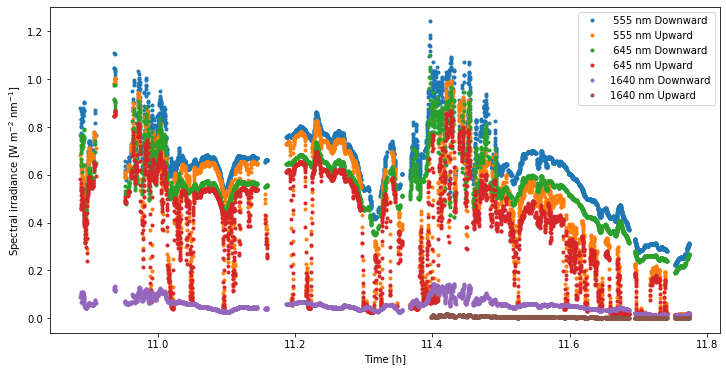

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Spectral irradiance [W m$^{-2}$ nm$^{-1}$]')
ax.set_xlabel('Time [h]')
ax.plot(data.Time_s/3600.0, data.Ed_555_Wm2nm, '.', label=' 555 nm Downward')
ax.plot(data.Time_s/3600.0, data.Eu_555_Wm2nm, '.', label=' 555 nm Upward')
ax.plot(data.Time_s/3600.0, data.Ed_645_Wm2nm, '.', label=' 645 nm Downward')
ax.plot(data.Time_s/3600.0, data.Eu_645_Wm2nm, '.', label=' 645 nm Upward')
ax.plot(data.Time_s/3600.0, data.Ed_1640_Wm2nm, '.', label='1640 nm Downward')
ax.plot(data.Time_s/3600.0, data.Eu_1640_Wm2nm, '.', label='1640 nm Upward')
ax.legend(loc='upper right')

## Plotting a map

Using the Cartopy module, the data can be plotted as a function of latitude and longitude. An additional Natural Earth feature of Cartopy is used to show the Svalbard landmass with a black facecolor. For each dataset a distinct plot can be made that shows the values of the corresponding data on the attached colorbar. A different colormap was chosen for the second plot to distinguish between the separat data products.

In [4]:
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')

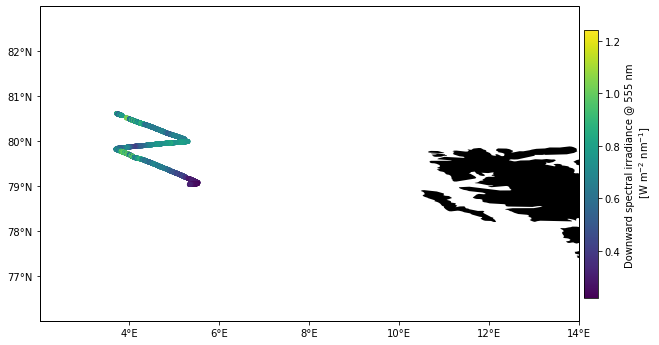

In [5]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
ax1.add_feature(land10m)
ax1.set_extent((2,14,76,83), crs=ccrs.PlateCarree())
sc = ax1.scatter(data.Longitude, data.Latitude, s=15, c=data.Ed_555_Wm2nm, transform=ccrs.PlateCarree())
ax1.set_xticks([4, 6, 8, 10, 12, 14], crs=ccrs.PlateCarree())
ax1.set_yticks(range(77,83), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cb = fig.colorbar(sc, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('Downward spectral irradiance @ 555 nm \n [W m$^{-2}$ nm$^{-1}$]')


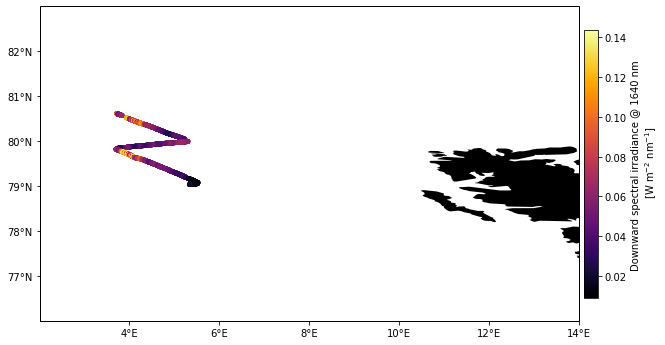

In [6]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')
ax1.add_feature(land10m)
ax1.set_extent((2,14,76,83), crs=ccrs.PlateCarree())
sc = ax1.scatter(data.Longitude, data.Latitude, s=15, c=data.Ed_1640_Wm2nm, transform=ccrs.PlateCarree(), cmap='inferno')
ax1.set_xticks([4, 6, 8, 10, 12, 14], crs=ccrs.PlateCarree())
ax1.set_yticks(range(77,83), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cb = fig.colorbar(sc, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('Downward spectral irradiance @ 1640 nm \n [W m$^{-2}$ nm$^{-1}$]')

